## Setting Up

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from model_funcs import *

%matplotlib inline

In [2]:
data = pd.read_csv('files/cleaned_data.csv')
X_train, X_test, y_train, y_test = data_split(data)

In [3]:
with open('files/tuned_hyperparams.json') as json_file:
    tuned_hyperparams = json.load(json_file)
tuned_hyperparams.keys()

dict_keys(['random_forest', 'gradient_boost', 'adaboost'])

## Random Forest Regression

### Base Model

TRAINING DATASET
MAE:  1.42 %
R2_SCORE:  0.964507766518983
----------------------------
TEST DATASET
MAE:  5.63 %
R2_SCORE:  0.7303618920413184
----------------------------


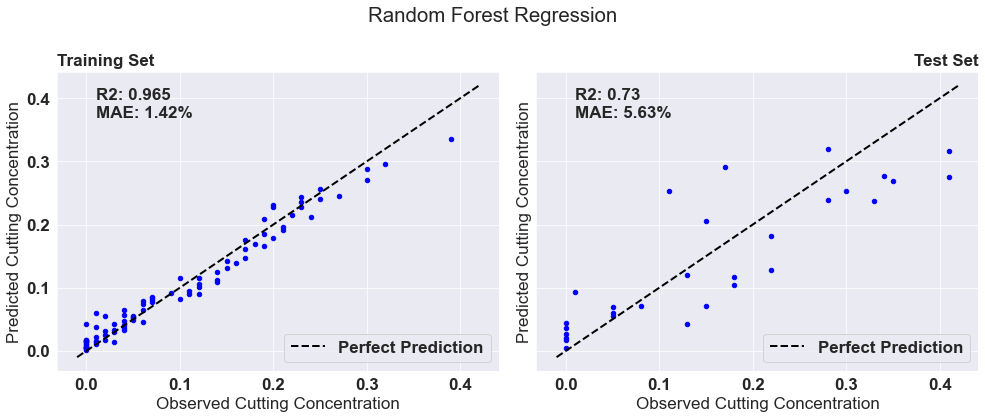

In [4]:
model_report(RandomForestRegressor(random_state = 42), X_train, y_train, X_test, y_test, model_type = 'Random Forest Regression')

### Original Model

In [5]:
original_model = RandomForestRegressor(random_state = 42, max_depth=15, n_estimators=143)

TRAINING DATASET
MAE:  1.42 %
R2_SCORE:  0.9645633757923217
----------------------------
TEST DATASET
MAE:  5.63 %
R2_SCORE:  0.7323878933465469
----------------------------


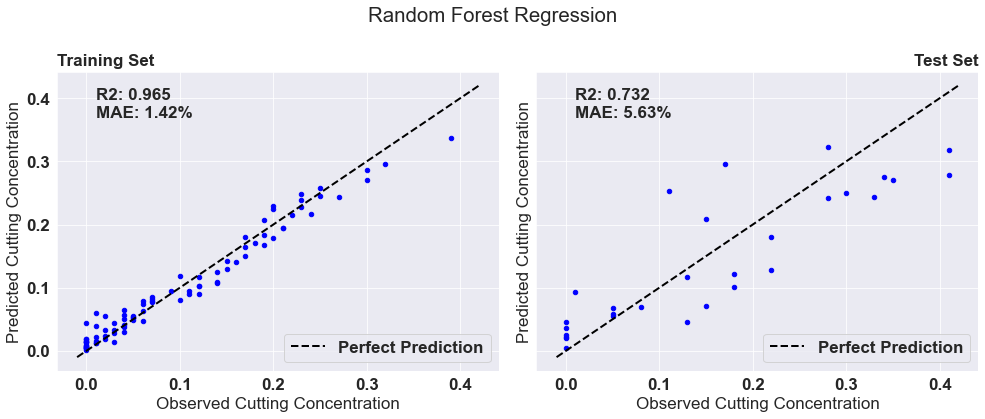

In [6]:
model_report(original_model, X_train, y_train, X_test, y_test, model_type = 'Random Forest Regression')

### Latest Model

In [7]:
tuned_hyperparams['random_forest']

{'max_depth': 150, 'n_estimators': 66, 'random_state': 42}

In [8]:
latest_model = RandomForestRegressor(random_state = 42, max_depth=150, n_estimators=66)

TRAINING DATASET
MAE:  1.39 %
R2_SCORE:  0.9647928993905527
----------------------------
TEST DATASET
MAE:  5.53 %
R2_SCORE:  0.735073926603623
----------------------------


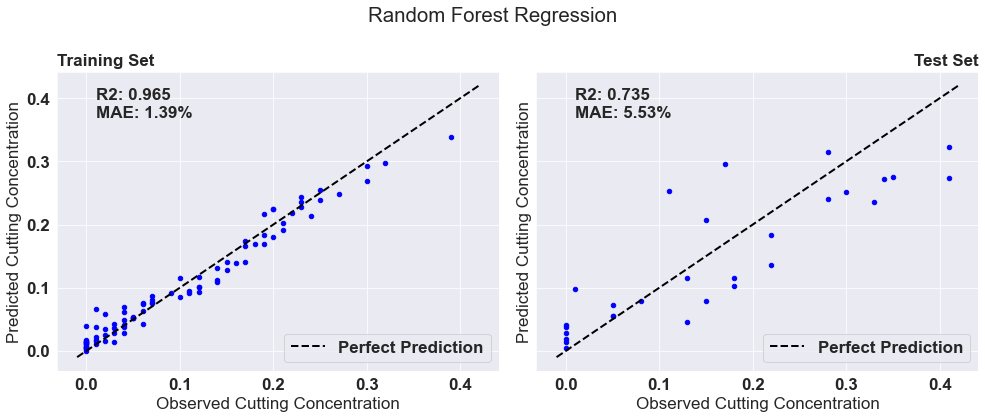

In [9]:
model_report(latest_model, X_train, y_train, X_test, y_test, model_type = 'Random Forest Regression')

## Gradient Boosting Regression

### Base Model

TRAINING DATASET
MAE:  1.67 %
R2_SCORE:  0.9400451416441955
----------------------------
TEST DATASET
MAE:  4.95 %
R2_SCORE:  0.7578836350931504
----------------------------


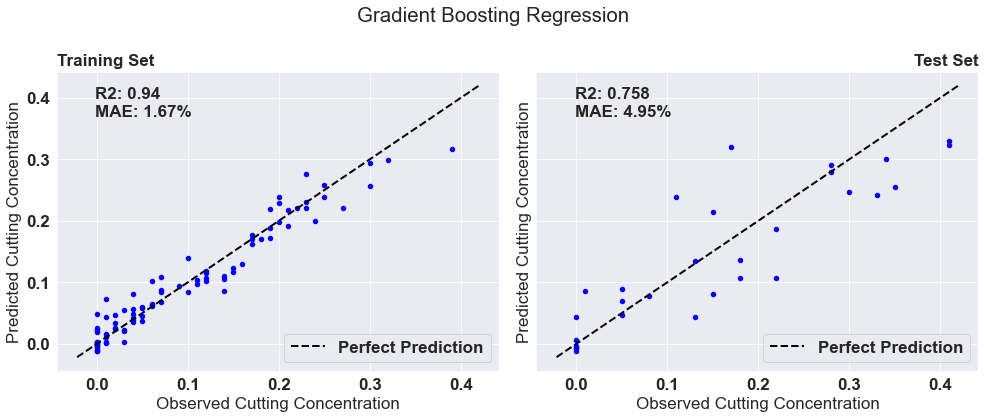

In [10]:
model_report(GradientBoostingRegressor(random_state = 42), X_train, y_train, X_test, y_test, model_type = 'Gradient Boosting Regression')

### Original Model

In [11]:
original_gb_model = GradientBoostingRegressor(learning_rate=0.21544346900318823, loss='huber',max_depth=7,
                                   n_estimators=185, n_iter_no_change=5, random_state=42, subsample=0.7,
                                   validation_fraction=0.2)

TRAINING DATASET
MAE:  1.02 %
R2_SCORE:  0.9241203138725326
----------------------------
TEST DATASET
MAE:  5.76 %
R2_SCORE:  0.7108839193400132
----------------------------


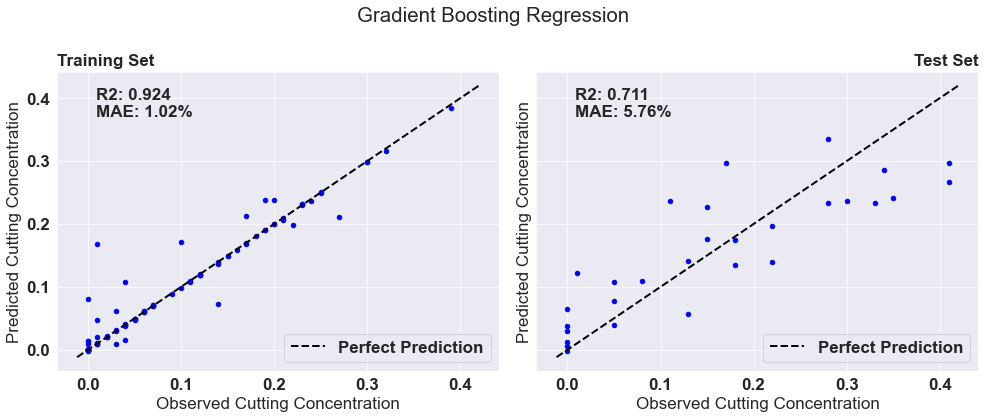

In [12]:
model_report(original_gb_model, X_train, y_train, X_test, y_test, model_type = 'Gradient Boosting Regression')

### Latest Model

In [13]:
tuned_hyperparams['gradient_boost']

{'learning_rate': 0.37500000000000006,
 'max_depth': 2,
 'n_estimators': 60,
 'n_iter_no_change': 5,
 'random_state': 42,
 'subsample': 0.92,
 'validation_fraction': 0.15}

In [14]:
latest_gbmodel = GradientBoostingRegressor(random_state = 42, max_depth=2, n_estimators=60, subsample =0.92,
                validation_fraction=0.15, learning_rate= 0.375, n_iter_no_change=5)

TRAINING DATASET
MAE:  3.16 %
R2_SCORE:  0.8232299571398389
----------------------------
TEST DATASET
MAE:  5.75 %
R2_SCORE:  0.7193360977915341
----------------------------


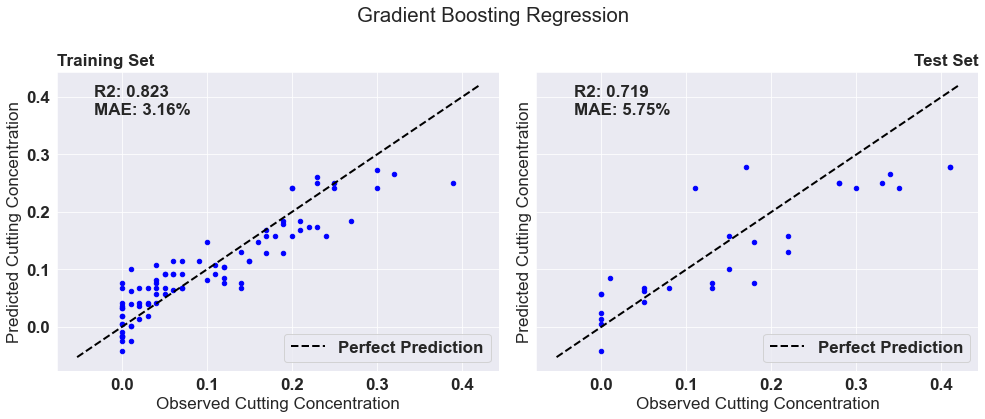

In [15]:
model_report(latest_gbmodel, X_train, y_train, X_test, y_test, model_type = 'Gradient Boosting Regression')

## Adaptive Boosting

### Base Model

TRAINING DATASET
MAE:  3.59 %
R2_SCORE:  0.8047714010603995
----------------------------
TEST DATASET
MAE:  6.38 %
R2_SCORE:  0.6719426557848852
----------------------------


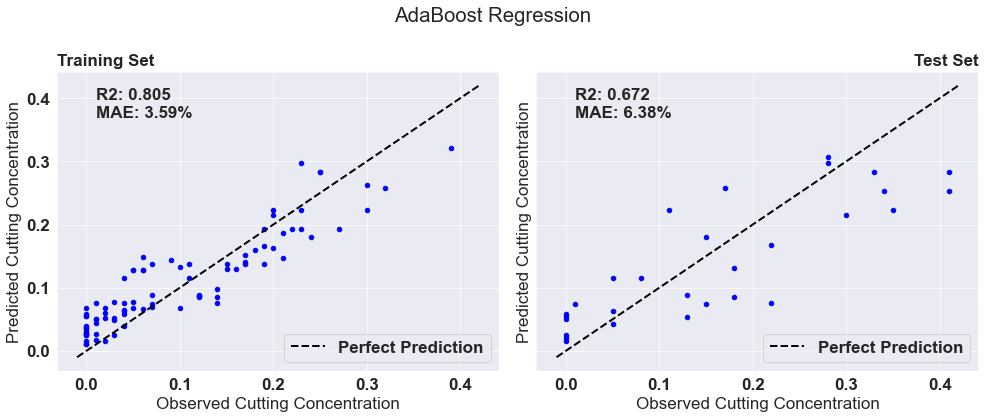

In [16]:
model_report(AdaBoostRegressor(random_state = 42), X_train, y_train, X_test, y_test, model_type = 'AdaBoost Regression')

### Original Model

In [17]:
original_ada_model = AdaBoostRegressor(base_estimator=GradientBoostingRegressor(random_state=42),
                  learning_rate=0.001, loss='exponential', n_estimators=61, random_state=42)

TRAINING DATASET
MAE:  1.33 %
R2_SCORE:  0.9593647089501971
----------------------------
TEST DATASET
MAE:  4.93 %
R2_SCORE:  0.7613840829791998
----------------------------


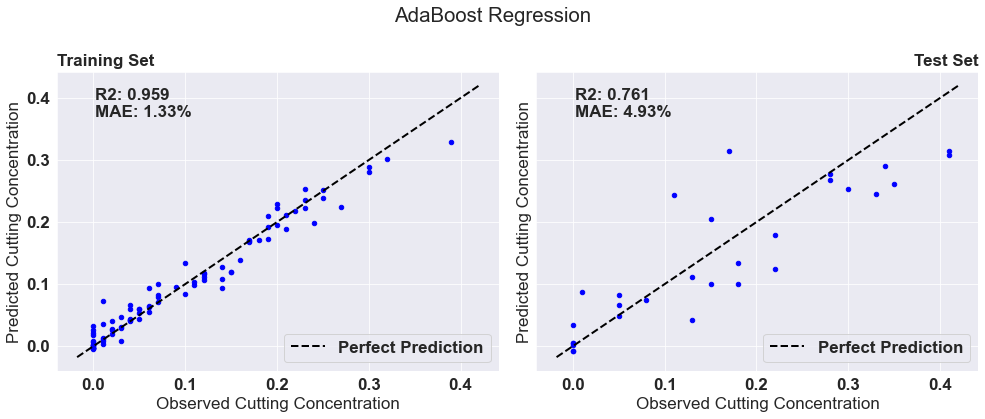

In [18]:
model_report(original_ada_model, X_train, y_train, X_test, y_test, model_type = 'AdaBoost Regression')

### Latest Model

In [19]:
tuned_hyperparams['adaboost']

{'base_estimator': 'GradientBoostingRegressor(random_state=42)',
 'learning_rate': 0.001,
 'loss': 'exponential',
 'n_estimators': 60,
 'random_state': 42}

In [20]:
latest_adamodel = AdaBoostRegressor(random_state = 42, n_estimators=60, learning_rate= 0.001, 
                    base_estimator=GradientBoostingRegressor(random_state=42), loss = 'exponential')

TRAINING DATASET
MAE:  1.32 %
R2_SCORE:  0.9593908158727177
----------------------------
TEST DATASET
MAE:  4.94 %
R2_SCORE:  0.7597770487792247
----------------------------


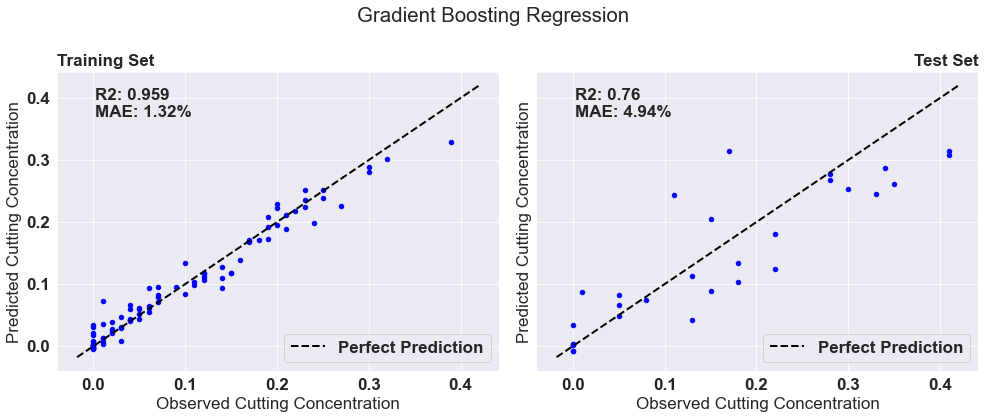

In [21]:
model_report(latest_adamodel, X_train, y_train, X_test, y_test, model_type = 'Gradient Boosting Regression')

## Exporting Best Model Versions

In [22]:
saved_models = {'rf': 'RandomForestRegressor(random_state = 42, max_depth=150, n_estimators=66)', 
'gb':'GradientBoostingRegressor(random_state = 42)', 
'adb':'AdaBoostRegressor(base_estimator=GradientBoostingRegressor(random_state=42), learning_rate=0.001, loss="exponential", n_estimators=61, random_state=42)'}

In [23]:
with open('files/saved_models.json', 'w') as model_file:
    json.dump(saved_models, model_file)